# Import the necessary libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical, pad_sequences
from keras.callbacks import EarlyStopping
%matplotlib inline

### Load the data into Pandas dataframe

In [18]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [19]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

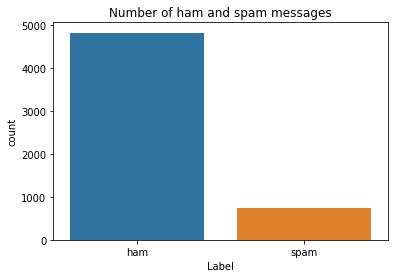

In [20]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [21]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

Split into training and test data.

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [27]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

### RNN


In [32]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(100,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.4)(layer)
    layer = Dense(10)(layer)
    layer = Activation('relu')(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

Call the function and compile the model.

In [34]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_2 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 100)               6500      
                                                                 
 activation_6 (Activation)   (None, 100)               0         
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010

Fit on the training data.

In [35]:
history = model.fit(sequences_matrix,Y_train,batch_size=64,epochs=15, validation_split=0.25)

Epoch 1/15
56/56 [==============================] - 11s 135ms/step - loss: 0.3373 - accuracy: 0.8615 - val_loss: 0.1611 - val_accuracy: 0.9079
Epoch 2/15
56/56 [==============================] - 7s 124ms/step - loss: 0.1083 - accuracy: 0.9772 - val_loss: 0.0824 - val_accuracy: 0.9806
Epoch 3/15
56/56 [==============================] - 7s 124ms/step - loss: 0.0269 - accuracy: 0.9913 - val_loss: 0.0841 - val_accuracy: 0.9789
Epoch 4/15
56/56 [==============================] - 7s 124ms/step - loss: 0.0172 - accuracy: 0.9963 - val_loss: 0.0815 - val_accuracy: 0.9848
Epoch 5/15
56/56 [==============================] - 7s 123ms/step - loss: 0.0090 - accuracy: 0.9977 - val_loss: 0.1024 - val_accuracy: 0.9856
Epoch 6/15
56/56 [==============================] - 7s 125ms/step - loss: 0.0085 - accuracy: 0.9969 - val_loss: 0.0918 - val_accuracy: 0.9848
Epoch 7/15
56/56 [==============================] - 7s 127ms/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.1078 - val_accuracy: 0.9856
Epoch

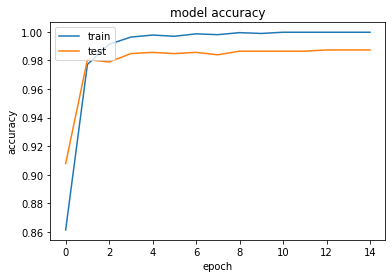

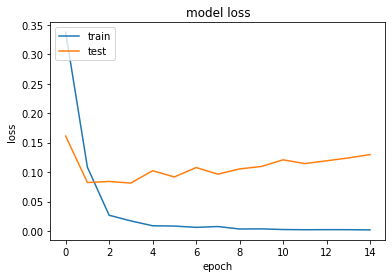

In [36]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The model performs well on the validation set and this configuration is chosen as the final model.

Process the test set data.

In [38]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

Evaluate the model on the test set.

In [39]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 1s 23ms/step - loss: 0.0814 - accuracy: 0.9904


In [40]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.081
  Accuracy: 0.990
